In [1]:
%matplotlib inline
from pymc3 import *
import pymc3 as pm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a = 1; b = 2;
size = 10;
np.random.seed(108727)
x = np.random.normal(0,.4,size = 10)
x.sort()
#x = np.linspace(-1,1,size+1)[:size] + np.random.uniform(0,0.1,size)
#x = np.random.uniform(-1,1,size)

true_y = a + b * x**2

# add noise
y = true_y + np.random.normal(scale=1, size=size)

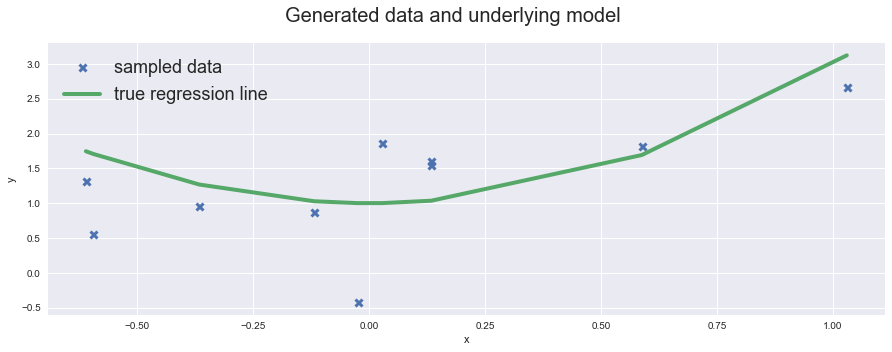

In [3]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
fig.suptitle('Generated data and underlying model', fontsize = 20)
ax.plot(x, y, 'x', label='sampled data', mew = 3)
ax.plot(x, true_y, label='true regression line', lw=4.)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0, fontsize = 18);

In [4]:
with Model() as m1:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 2)
    mu = Deterministic('mu', beta[0] + beta[1] * x)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t1 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 18.133:   3%|▎         | 6986/200000 [00:01<00:27, 7052.87it/s]
Convergence archived at 7400
Interrupted at 7,400 [3%]: Average Loss = 29.161
100%|██████████| 3500/3500 [00:10<00:00, 346.56it/s]


In [96]:
betasamps = t1[500:]['beta']

In [6]:
h = np.linspace(-1.5, 1.5, 100)

In [97]:
yhat = betasamps[:,0][:,np.newaxis] + betasamps[:,1][:,np.newaxis] * (h)
ysamps = yhat[np.random.randint(0,7500,10),:].T

yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

ml = pm.find_MAP(model = m1)
ymap = ml['beta'][0] + ml['beta'][1] * h

X = np.array([np.ones(10),x]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h]).T, betaml)

Optimization terminated successfully.
         Current function value: 15.582424
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16


In [101]:
def plot_regression(yhat, ymap, yml, ysamps):
    plt.figure(figsize=(15, 5));
    
    plt.fill_between(h, yhat[0], yhat[2], facecolor='gray', alpha = 0.4, zorder = 1);
    plt.plot(h, yhat[1], label = 'Median curve', lw=3., c='b', linestyle=':', zorder = 1);
    plt.plot(h, ymap, label='MAP curve', lw=3., c='g', zorder = 1);
    plt.plot(h, yml, label='MLE curve', lw=3., c='k', zorder = 1);
    plt.plot(h, ysamps.mean(axis=1), c = 'orange', lw = 3, label = 'Sample mean',zorder = 1);
    plt.plot(h, ysamps[:,0], label = 'Sample line',c = 'k', alpha = .3, linestyle = '--', zorder = 1);
    plt.plot(h, ysamps[:,1:], c = 'k', alpha = .3, linestyle = '--', zorder = 1);
#    plt.plot(x, true_y, label='true regression line', lw=2., c='r', linestyle ='--', zorder = 1);
    plt.scatter(x, y,  marker = '.', c = 'r', s = 150, zorder = 2);
    
    plt.title('Posterior predictive regression lines', fontsize = 20)
    plt.legend(bbox_to_anchor=(0.5, -0.2), loc=9,
                   ncol=2, mode="expand", borderaxespad=0., fontsize = 18);
    plt.ylim([-1,10])

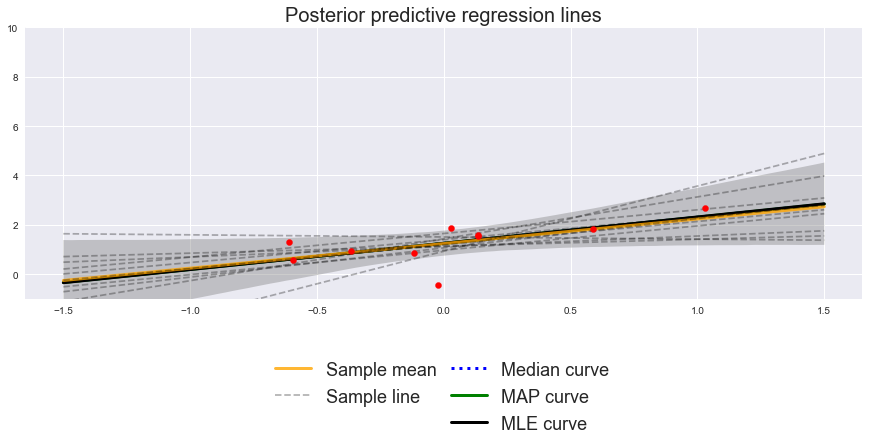

In [98]:
plot_regression(yhat, ymap, yml, ysamps)

In [10]:
with Model() as m2:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 3)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t2 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 21.014:   2%|▏         | 4881/200000 [00:00<00:31, 6137.70it/s]
Convergence archived at 5500
Interrupted at 5,500 [2%]: Average Loss = 33.804
100%|██████████| 3500/3500 [00:09<00:00, 350.71it/s]


In [99]:
betasamps = t2[500:]['beta']
yhat = betasamps[:,0][:,np.newaxis] + betasamps[:,1][:,np.newaxis] * (h)
yhat += betasamps[:,2][:,np.newaxis] * (h**2)
ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

ml = pm.find_MAP(model = m2)
ymap = ml['beta'][0] + ml['beta'][1] * h + ml['beta'][2] * h**2

X = np.array([np.ones(10),x, x**2]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2]).T, betaml)

Optimization terminated successfully.
         Current function value: 17.523443
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18


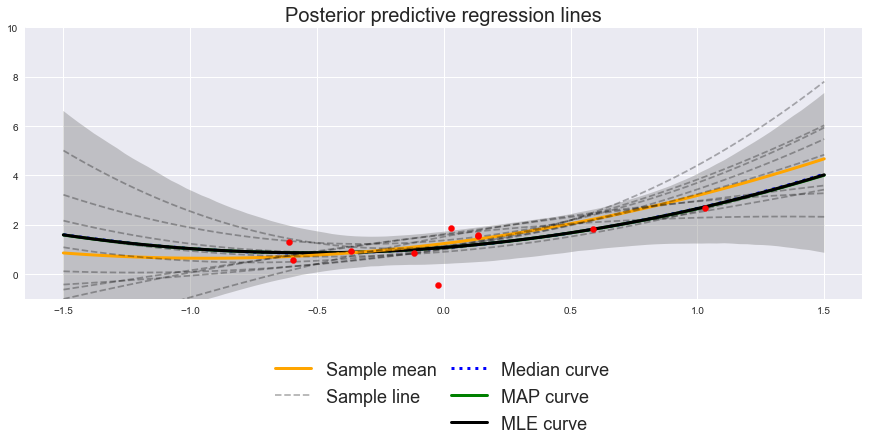

In [102]:
plot_regression(yhat, ymap, yml, ysamps)

In [13]:
with Model() as m3:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 4)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t3 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 22.45:   3%|▎         | 5384/200000 [00:00<00:32, 5901.39it/s] 
Convergence archived at 5600
Interrupted at 5,600 [2%]: Average Loss = 33.459
100%|█████████▉| 3484/3500 [00:18<00:00, 217.94it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [00:18<00:00, 192.73it/s]
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 1 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))


In [103]:
betasamps = t3[500:]['beta']
degree = betasamps.shape[1]

yhat = betasamps[:,0][:,np.newaxis] + betasamps[:,1][:,np.newaxis] * (h)
yhat += betasamps[:,2][:,np.newaxis] * (h**2)
yhat += betasamps[:,3][:,np.newaxis] * (h**3)
ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

ml = pm.find_MAP(model = m3)
ymap = ml['beta'][0] + ml['beta'][1] * h + ml['beta'][2] * h**2 + ml['beta'][3] * h**3 

X = np.array([np.ones(10),x, x**2, x**3]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3]).T, betaml)

Optimization terminated successfully.
         Current function value: 19.927454
         Iterations: 15
         Function evaluations: 19
         Gradient evaluations: 19


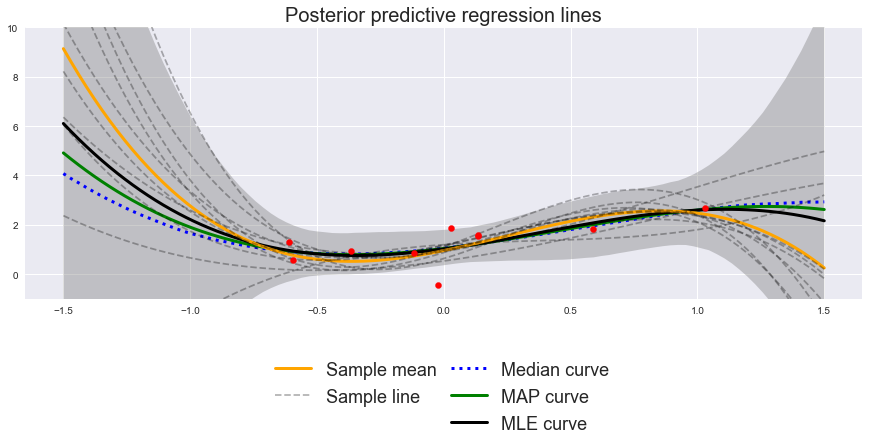

In [104]:
plot_regression(yhat, ymap, yml,ysamps)

In [16]:
with Model() as m4:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 5)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3 + beta[4] * x**4)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t4 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 25.158:   2%|▏         | 4483/200000 [00:00<00:35, 5502.60it/s]
Convergence archived at 4900
Interrupted at 4,900 [2%]: Average Loss = 36.534
100%|█████████▉| 3490/3500 [00:31<00:00, 114.19it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [00:31<00:00, 110.13it/s]
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 2 contains 5 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))


In [105]:
betasamps = t4[500:]['beta']
degree = betasamps.shape[1]

yhat = betasamps[:,0][:,np.newaxis] + betasamps[:,1][:,np.newaxis] * (h)
yhat += betasamps[:,2][:,np.newaxis] * (h**2)
yhat += betasamps[:,3][:,np.newaxis] * (h**3)
yhat += betasamps[:,4][:,np.newaxis] * (h**4)
ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

ml = pm.find_MAP(model = m4)
ymap = ml['beta'][0] + ml['beta'][1] * h + ml['beta'][2] * h**2 + ml['beta'][3] * h**3 + ml['beta'][4] * h**4 

X = np.array([np.ones(10),x, x**2, x**3, x**4]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3, h**4]).T, betaml)

Optimization terminated successfully.
         Current function value: 22.425846
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23


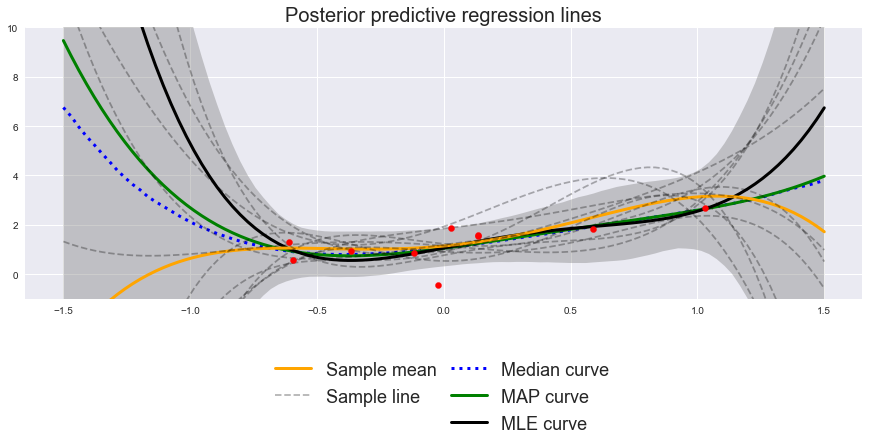

In [106]:
plot_regression(yhat, ymap, yml, ysamps)

In [19]:
with Model() as m5:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 6)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3 + beta[4] * x**4 + beta[5] * x**5)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t5 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 25.707:   3%|▎         | 5610/200000 [00:01<00:38, 5050.05it/s]
Convergence archived at 5900
Interrupted at 5,900 [2%]: Average Loss = 37.266
100%|█████████▉| 3499/3500 [00:42<00:00, 86.46it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 11 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [00:42<00:00, 81.76it/s]
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 2 contains 44 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chai

In [107]:
betasamps = t5[500:]['beta']
degree = betasamps.shape[1]

yhat = betasamps[:,0][:,np.newaxis] + betasamps[:,1][:,np.newaxis] * (h)
yhat += betasamps[:,2][:,np.newaxis] * (h**2)
yhat += betasamps[:,3][:,np.newaxis] * (h**3)
yhat += betasamps[:,4][:,np.newaxis] * (h**4)
yhat += betasamps[:,5][:,np.newaxis] * (h**5)
ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

ml = pm.find_MAP(model = m5)
ymap = ml['beta'][0] + ml['beta'][1] * h + ml['beta'][2] * h**2 + ml['beta'][3] * h**3 + ml['beta'][4] * h**4 + \
    ml['beta'][5] * h**5
    
X = np.array([np.ones(10),x, x**2, x**3, x**4, x**5]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3, h**4, h**5]).T, betaml)    

Optimization terminated successfully.
         Current function value: 24.951729
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29


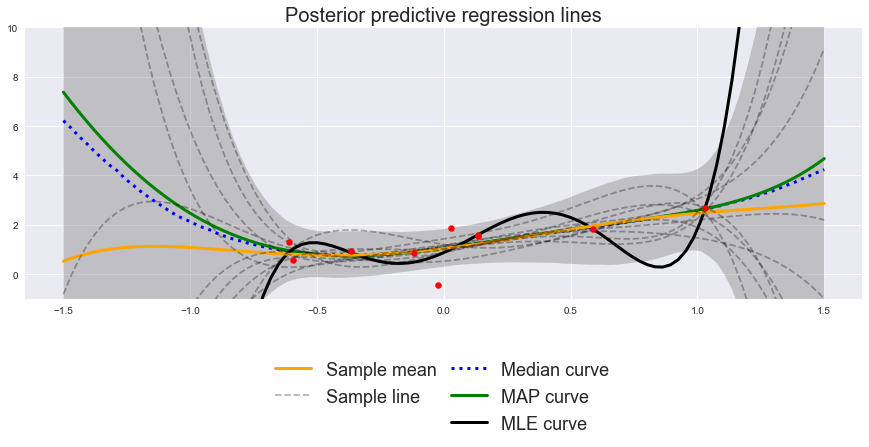

In [108]:
plot_regression(yhat, ymap, yml, ysamps)

In [22]:
with Model() as m6:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 7)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3 + beta[4] * x**4 + beta[5] * x**5 + beta[6] * x**6)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t6 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 27.487:   3%|▎         | 5786/200000 [00:01<00:37, 5189.74it/s]
Convergence archived at 5900
Interrupted at 5,900 [2%]: Average Loss = 39.13
 97%|█████████▋| 3394/3500 [00:55<00:01, 60.61it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 2 contains 51 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 3497/3500 [00:57<00:00, 59.16it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 39 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [00:57<00:00, 60.76it/s]
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pym

In [109]:
betasamps = t6[500:]['beta']
degree = betasamps.shape[1]

yhat = betasamps[:,0][:,np.newaxis] + betasamps[:,1][:,np.newaxis] * (h)
yhat += betasamps[:,2][:,np.newaxis] * (h**2)
yhat += betasamps[:,3][:,np.newaxis] * (h**3)
yhat += betasamps[:,4][:,np.newaxis] * (h**4)
yhat += betasamps[:,5][:,np.newaxis] * (h**5)
yhat += betasamps[:,6][:,np.newaxis] * (h**6)
ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

ml = pm.find_MAP(model = m6)
ymap = ml['beta'][0] + ml['beta'][1] * h + ml['beta'][2] * h**2 + ml['beta'][3] * h**3 + ml['beta'][4] * h**4 + \
    ml['beta'][5] * h**5 + ml['beta'][6] * h**6
    
X = np.array([np.ones(10),x, x**2, x**3, x**4, x**5, x**6]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3, h**4, h**5, h**6]).T, betaml)

Optimization terminated successfully.
         Current function value: 27.466853
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28


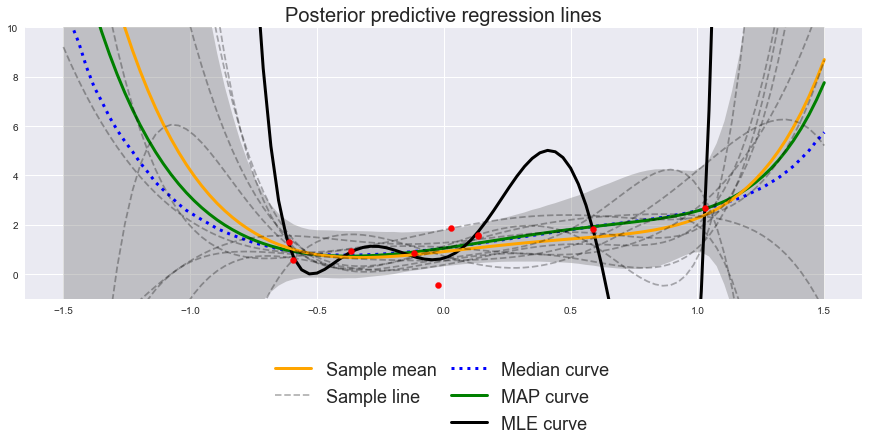

In [110]:
plot_regression(yhat, ymap, yml, ysamps)

In [25]:
with Model() as m7:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5e0, shape = 8)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3 + beta[4] * x**4 + beta[5] * x**5 + beta[6] * x**6 + beta[7] * x**7)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t7 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 29.813:   3%|▎         | 5251/200000 [00:01<00:36, 5348.23it/s]
Convergence archived at 5700
Interrupted at 5,700 [2%]: Average Loss = 41.24
 97%|█████████▋| 3395/3500 [01:08<00:02, 51.50it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 1 contains 88 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 3496/3500 [01:10<00:00, 48.40it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 44 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [01:10<00:00, 49.68it/s]
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pym

In [111]:
betasamps = t7[500:]['beta']
degree = betasamps.shape[1]

yhat = betasamps[:,0][:,np.newaxis] + betasamps[:,1][:,np.newaxis] * (h)
yhat += betasamps[:,2][:,np.newaxis] * (h**2)
yhat += betasamps[:,3][:,np.newaxis] * (h**3)
yhat += betasamps[:,4][:,np.newaxis] * (h**4)
yhat += betasamps[:,5][:,np.newaxis] * (h**5)
yhat += betasamps[:,6][:,np.newaxis] * (h**6)
yhat += betasamps[:,7][:,np.newaxis] * (h**7)
ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

ml = pm.find_MAP(model = m7)
ymap = ml['beta'][0] + ml['beta'][1] * h + ml['beta'][2] * h**2 + ml['beta'][3] * h**3 + ml['beta'][4] * h**4 + \
    ml['beta'][5] * h**5 + ml['beta'][6] * h**6 + ml['beta'][7] * h**7
    
X = np.array([np.ones(10),x, x**2, x**3, x**4, x**5, x**6, x**7]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3, h**4, h**5, h**6, h**7]).T, betaml)

Optimization terminated successfully.
         Current function value: 29.991660
         Iterations: 29
         Function evaluations: 35
         Gradient evaluations: 35


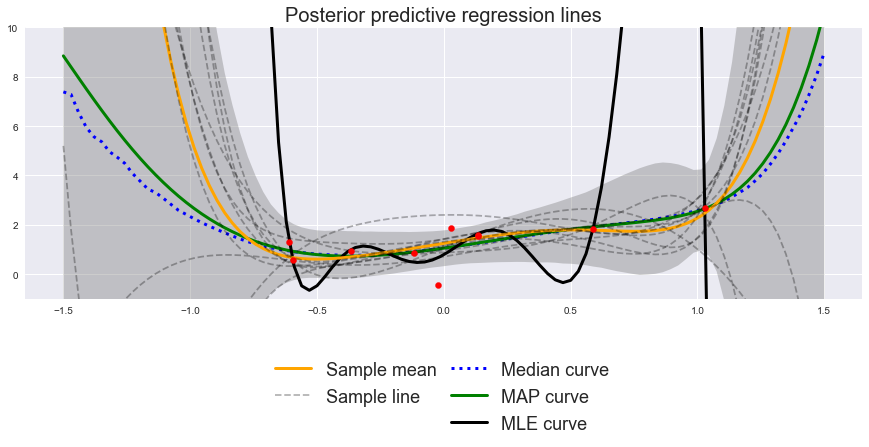

In [112]:
plot_regression(yhat, ymap, yml, ysamps)